In [1]:
function supnorm(u) 
    s = 0 
    for entry in u 
        s = max(abs(entry),s) 
    end 
    return s 
end 

function inner_product(u::Array{<:Real,1}, v::Array{<:Real,1}) 
    s = 0 
    n = size(u)[1] 
    for i in 1:n
        s += u[i] * v[i] 
    end 
    return s
end

inner_product (generic function with 1 method)

In [2]:
function power_method(A::Array{<:Real,2}, x0::Array{<:Real,1})
    y = A*x0
    x = y / supnorm(y)
    return y
end

function rayleigh(A::Array{<:Real,2}, x0::Array{<:Real,1})
    lambda = inner_product(x0, A*x0) / inner_product(x0, x0)
    return lambda
end

rayleigh (generic function with 1 method)

In [3]:
function power_method_iterate(A::Array{<:Real,2}, x::Array{<:Real,1}, iterations::Int)
    for i in 1:iterations
        x = power_method(A, x)
    end
    lambda = rayleigh(A, x)
    return x, lambda
end 

power_method_iterate (generic function with 1 method)

In [92]:
A = [0 0 1 1/2; 1/3 0 0 0; 1/3 1/2 0 1/2; 1/3 1/2 0 0]

4×4 Matrix{Float64}:
 0.0       0.0  1.0  0.5
 0.333333  0.0  0.0  0.0
 0.333333  0.5  0.0  0.5
 0.333333  0.5  0.0  0.0

In [5]:
x0 = ones(4) / 4
x0 = [1; 0; 0; 0]

4-element Vector{Int64}:
 1
 0
 0
 0

In [6]:
power_method_iterate(A, x0, 100)[1]

4-element Vector{Float64}:
 0.3870967741935477
 0.1290322580645159
 0.2903225806451608
 0.19354838709677386

In [7]:
power_method_iterate(A, x0, 100)[2]

1.0

In [8]:
sortperm(power_method_iterate(A, x0, 100)[1], rev=true)

4-element Vector{Int64}:
 1
 3
 4
 2

In [9]:
function check_unit_columns(A::Array{<:Real,2})
    n = size(A)[1]
    
    for j in 1:n
        s = 0
        for i in 1:n
            s += A[i, j]
        end
        println("Column ", j, ": ", s)
    end
end

function fill_columns(A::Array{<:Real,2})
    n = size(A)[1]
    
    B = zeros(size(A)[1], size(A)[2])
    
    for j in 1:n
        s = 0
        for i in 1:n
            s += A[i, j]
            B[i, j] += A[i, j]
        end
        if s < 1
            to_add = (1 - s) / n
            for i in 1:n
                B[i, j] += to_add
            end
        end
    end
    
    return B
end

B = [1. 0 0; 0 0 0; 0 0 0.5]

println(fill_columns(A))
println(fill_columns(B))

check_unit_columns(fill_columns(A))
check_unit_columns(fill_columns(B))

function teleport(A::Array{<:Real,2}, damp::Real=0.15)
    A = fill_columns(A)
    return (1 - damp)*A + damp*(ones(size(A)[1], size(A)[2]) / size(A)[1])
end

println(teleport(A))
println(teleport(B))

check_unit_columns(teleport(A))
check_unit_columns(teleport(B))

println(A)
println(B)

function page_rank(A::Array{<:Real,2}, x::Array{<:Real,1}=[NaN], iterations::Int=100, page_names=[nothing], 
        damp::Real=NaN, fill_cols::Bool=false)
    println(A)
    
    if !isnan(damp)
        A = teleport(A, damp)
    elseif fill_cols
        A = fill_columns(A)
    end
    
    println(A)
    
    if isnan(x[1])
        x = ones(size(A)[1]) / size(A)[1]
        println(x)
    end
    
    for i in 1:iterations
        x = power_method(A, x)
    end
    lambda = rayleigh(A, x)
    
    println("Largest eigenvalue (should be 1): ", lambda)
    println("Page rank weight eigenvector: ", x)
    if isnothing(page_names[1])
        println("Pages in order from most to least important: ", sortperm(x, rev=true)) 
    else 
        println("Pages in order from most to least important: ", page_names[sortperm(x, rev=true)]) 
    end
    
    return x, lambda
end 

[0.0 0.0 1.0 0.5; 0.3333333333333333 0.0 0.0 0.0; 0.3333333333333333 0.5 0.0 0.5; 0.3333333333333333 0.5 0.0 0.0]
[1.0 0.3333333333333333 0.16666666666666666; 0.0 0.3333333333333333 0.16666666666666666; 0.0 0.3333333333333333 0.6666666666666666]
Column 1: 1.0
Column 2: 1.0
Column 3: 1.0
Column 4: 1.0
Column 1: 1.0
Column 2: 1.0
Column 3: 1.0
[0.0375 0.0375 0.8875 0.46249999999999997; 0.3208333333333333 0.0375 0.0375 0.0375; 0.3208333333333333 0.46249999999999997 0.0375 0.46249999999999997; 0.3208333333333333 0.46249999999999997 0.0375 0.0375]
[0.9 0.3333333333333333 0.19166666666666665; 0.049999999999999996 0.3333333333333333 0.19166666666666665; 0.049999999999999996 0.3333333333333333 0.6166666666666667]
Column 1: 0.9999999999999999
Column 2: 1.0
Column 3: 0.9999999999999999
Column 4: 0.9999999999999999
Column 1: 1.0
Column 2: 1.0
Column 3: 1.0
[0.0 0.0 1.0 0.5; 0.3333333333333333 0.0 0.0 0.0; 0.3333333333333333 0.5 0.0 0.5; 0.3333333333333333 0.5 0.0 0.0]
[1.0 0.0 0.0; 0.0 0.0 0.0; 0

page_rank (generic function with 6 methods)

In [10]:
page_rank(A, x0, 100, ["Google" "Apple" "Sony" "Jamba Juice"])[1]

[0.0 0.0 1.0 0.5; 0.3333333333333333 0.0 0.0 0.0; 0.3333333333333333 0.5 0.0 0.5; 0.3333333333333333 0.5 0.0 0.0]
[0.0 0.0 1.0 0.5; 0.3333333333333333 0.0 0.0 0.0; 0.3333333333333333 0.5 0.0 0.5; 0.3333333333333333 0.5 0.0 0.0]
Largest eigenvalue (should be 1): 1.0
Page rank weight eigenvector: [0.3870967741935477, 0.1290322580645159, 0.2903225806451608, 0.19354838709677386]
Pages in order from most to least important: ["Google", "Sony", "Jamba Juice", "Apple"]


4-element Vector{Float64}:
 0.3870967741935477
 0.1290322580645159
 0.2903225806451608
 0.19354838709677386

In [11]:
page_rank(A)[1]

[0.0 0.0 1.0 0.5; 0.3333333333333333 0.0 0.0 0.0; 0.3333333333333333 0.5 0.0 0.5; 0.3333333333333333 0.5 0.0 0.0]
[0.0 0.0 1.0 0.5; 0.3333333333333333 0.0 0.0 0.0; 0.3333333333333333 0.5 0.0 0.5; 0.3333333333333333 0.5 0.0 0.0]
[0.25, 0.25, 0.25, 0.25]
Largest eigenvalue (should be 1): 1.0
Page rank weight eigenvector: [0.38709677419354754, 0.12903225806451585, 0.29032258064516064, 0.19354838709677377]
Pages in order from most to least important: [1, 3, 4, 2]


4-element Vector{Float64}:
 0.38709677419354754
 0.12903225806451585
 0.29032258064516064
 0.19354838709677377

In [12]:
page_rank(B, [NaN], 100, ["Google" "Apple" "Sony" "Jamba Juice"], 0.15)[1]

[1.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.5]
[0.9 0.3333333333333333 0.19166666666666665; 0.049999999999999996 0.3333333333333333 0.19166666666666665; 0.049999999999999996 0.3333333333333333 0.6166666666666667]
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Largest eigenvalue (should be 1): 1.0
Page rank weight eigenvector: [0.7087827426810486, 0.10631741140215725, 0.1848998459167952]
Pages in order from most to least important: ["Google", "Sony", "Apple"]


3-element Vector{Float64}:
 0.7087827426810486
 0.10631741140215725
 0.1848998459167952

In [13]:
page_rank(B, [NaN], 100, ["Google" "Apple" "Sony" "Jamba Juice"], NaN)[1]

[1.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.5]
[1.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.5]
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Largest eigenvalue (should be 1): 1.0
Page rank weight eigenvector: [0.3333333333333333, 0.0, 2.629536350736706e-31]
Pages in order from most to least important: ["Google", "Sony", "Apple"]


3-element Vector{Float64}:
 0.3333333333333333
 0.0
 2.629536350736706e-31

In [14]:
C = [0 0 0; 0 0 0; 1. 1. 0]
page_rank(C, [NaN], 100, ["Google" "Apple" "Sony" "Jamba Juice"], NaN)[1]

[0.0 0.0 0.0; 0.0 0.0 0.0; 1.0 1.0 0.0]
[0.0 0.0 0.0; 0.0 0.0 0.0; 1.0 1.0 0.0]
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Largest eigenvalue (should be 1): NaN
Page rank weight eigenvector: [0.0, 0.0, 0.0]
Pages in order from most to least important: ["Google", "Apple", "Sony"]


3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [150]:
page_rank(C, [NaN], 100, ["Google" "Apple" "Sony" "Jamba Juice"], NaN, true)[1]

[0.0 0.0 0.0; 0.0 0.0 0.0; 1.0 1.0 0.0]
[0.0 0.0 0.3333333333333333; 0.0 0.0 0.3333333333333333; 1.0 1.0 0.3333333333333333]
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Largest eigenvalue (should be 1): 1.0
Page rank weight eigenvector: [0.19999999999999943, 0.19999999999999943, 0.5999999999999983]
Pages in order from most to least important: ["Sony", "Google", "Apple"]


3-element Vector{Float64}:
 0.19999999999999943
 0.19999999999999943
 0.5999999999999983

In [18]:
import Pkg; Pkg.add("LightGraphs")
import Pkg; Pkg.add("SimpleWeightedGraphs")
using LightGraphs
using SimpleWeightedGraphs

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
   Installed Graphs ─────────────── v1.4.1
   Installed SimpleWeightedGraphs ─ v1.2.1
    Updating `~/.julia/environments/v1.6/Project.toml`
  [47aef6b3] + SimpleWeightedGraphs v1.2.1
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [86223c79] + Graphs v1.4.1
  [47aef6b3] + SimpleWeightedGraphs v1.2.1
Precompiling project...
  ✓ Graphs
  ✓ SimpleWeightedGraphs
  2 dependencies successfully precompiled in 6 seconds (209 already precompiled)


In [23]:
A_graph = SimpleWeightedDiGraph(A)

{4, 8} directed simple Int64 graph with Float64 weights

In [22]:
# https://discourse.julialang.org/t/interactive-network-visualization/49054/4
import Pkg; Pkg.add("GLMakie")
import Pkg; Pkg.add("GraphMakie")
using GLMakie, GraphMakie

function networkplot(g)
    fig, ax, p = graphplot(g)
    
    hidedecorations!(ax)
    hidespines!(ax)

    function node_drag_action(state, idx, event, axis)
        p[:node_pos][][idx] = event.data
        p[:node_pos][] = p[:node_pos][]
    end

    ndrag = NodeDragHandler(node_drag_action)

    deregister_interaction!(ax, :rectanglezoom)
    register_interaction!(ax, :ndrag, ndrag)

    fig
end

   Resolving package versions...
   Installed ShaderAbstractions ─ v0.2.8
   Installed GLFW ─────────────── v3.4.1
   Installed ModernGL ─────────── v1.1.3
   Installed GLMakie ──────────── v0.4.6
   Installed MeshIO ───────────── v0.4.9
    Updating `~/.julia/environments/v1.6/Project.toml`
  [e9467ef8] + GLMakie v0.4.6
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [f7f18e0c] + GLFW v3.4.1
  [e9467ef8] + GLMakie v0.4.6
  [7269a6da] + MeshIO v0.4.9
  [66fc600b] + ModernGL v1.1.3
  [65257c39] + ShaderAbstractions v0.2.8
    Building ModernGL → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/1b4ca9b2956401690dfbf1b49e345ca539b54b03/build.log`
Precompiling project...
  ✓ GLFW
  ✓ ModernGL
  ✓ ShaderAbstractions
  ✓ MeshIO
  ✓ GLMakie
  5 dependencies successfully precompiled in 25 seconds (211 already precompiled)
   Resolving package versions...
   Installed NetworkLayout ─ v0.4.3
   Installed GraphMakie ──── v0.3.0
    Updating `~/.julia/environments/v1.6/Projec

networkplot (generic function with 1 method)

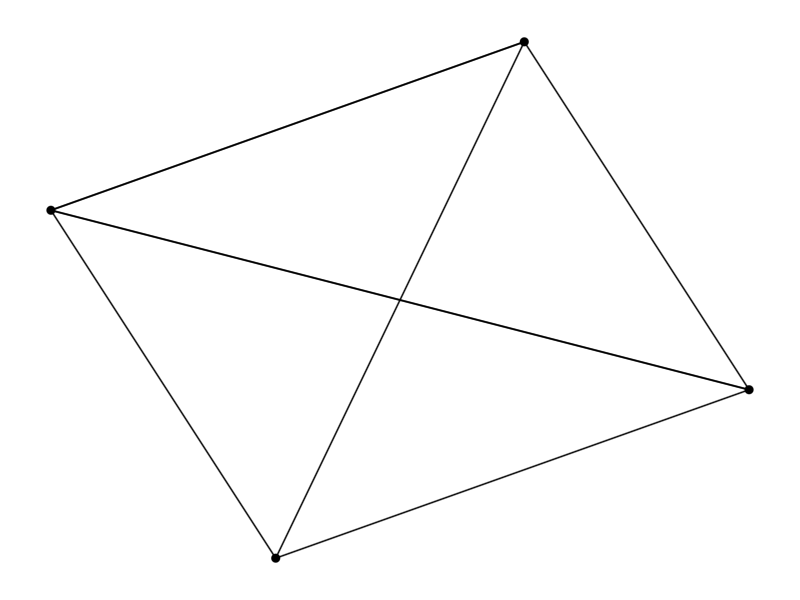

In [25]:
networkplot(A_graph)

In [42]:
import Pkg; Pkg.add("GraphRecipes")
import Pkg; Pkg.add("Plots")
using GraphRecipes
using Plots

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
Precompiling project...
  ✓ AxisAlgorithms
  ✓ SimpleTraits
  ✓ ChainRulesCore
  ✓ DataStructures
  ✓ Static
  ✓ GeometryTypes
  ✓ Latexify
  ✓ StackViews
  ✓ Colors
  ✓ PaddedViews
  ✓ TimeZones
  ✓ IJulia
  ✓ SortingAlgorithms
  ✓ LogExpFunctions
  ✓ ShaderAbstractions
  ✓ MeshIO
  ✓ Interpolations
  ✓ QuadGK
  ✓ ArrayInterface
  ✓ Graphics
  ✓ Animations
  ✓ Graphs
  ✓ LightGraphs
  ✓ OpenEXR
  ✓ MosaicViews
  ✓ ColorBrewer
  ✓ ColorSchemes
  ✓ EllipsisNotation
  ✓ StatsBase
  ✓ Intervals
  ✓ Cairo
  ✓ IntervalSets
  ✓ SimpleWeightedGraphs
  ✓ SpecialFunctions
  ✓ Polynomials
  ✓ StatsFuns
  ✓ ColorVectorSpace
  ✓ PlotUtils
  ✓ TiffImages
  ✓ FreeTypeAbstraction
  ✓ Distributions
  ✓ RecipesPipeline
  ✓ PlotThemes
  ✓ GraphRecipes
  ✓ KernelDensity
  ✓ MathTeXEngine
  ✓ ImageCore
  ✓ Netpbm
  ✓ PNGFiles
  ✓ ImageIO
  ✓ Plots
  ✓ Makie


In [43]:
import Pkg; Pkg.add("Graphs")
using Graphs

   Resolving package versions...
    Updating `~/.julia/environments/v1.6/Project.toml`
  [86223c79] + Graphs v1.4.1
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
Precompiling project...
  ✓ AxisAlgorithms
  ✓ ChainRulesCore
  ✓ SimpleTraits
  ✓ DataStructures
  ✓ Latexify
  ✓ StackViews
  ✓ Static
  ✓ GeometryTypes
  ✓ PaddedViews
  ✓ Colors
  ✓ IJulia
  ✓ TimeZones
  ✓ SortingAlgorithms
  ✓ MeshIO
  ✓ ShaderAbstractions
  ✓ LogExpFunctions
  ✓ QuadGK
  ✓ Interpolations
  ✓ ArrayInterface
  ✓ MosaicViews
  ✓ Graphics
  ✓ Animations
  ✓ Graphs
  ✓ LightGraphs
  ✓ OpenEXR
  ✓ Intervals
  ✓ StatsBase
  ✓ ColorBrewer
  ✓ EllipsisNotation
  ✓ ColorSchemes
  ✓ Cairo
  ✓ SimpleWeightedGraphs
  ✓ IntervalSets
  ✓ SpecialFunctions
  ✓ Polynomials
  ✓ StatsFuns
  ✓ ColorVectorSpace
  ✓ TiffImages
  ✓ PlotUtils
  ✓ FreeTypeAbstraction
  ✓ Distributions
  ✓ RecipesPipeline
  ✓ PlotThemes
  ✓ GraphRecipes
  ✓ KernelDensity
  ✓ MathTeXEngine
  ✓ ImageCore
  ✓ Netpbm
  ✓ PNGFiles
  ✓ Im

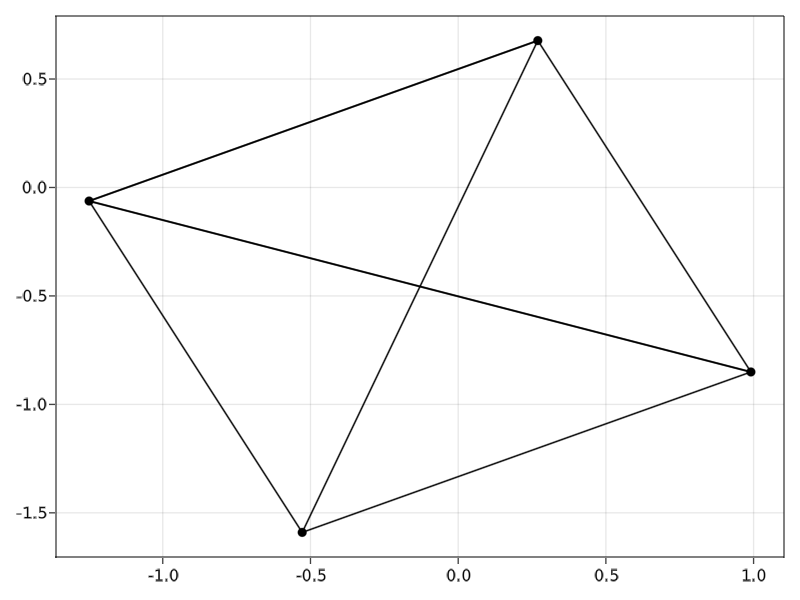

In [45]:
n = size(A)[1]
# graphplot(A,
#           markersize = 0.2,
#           node_weights = 1:n,
#           markercolor = range(colorant"yellow", stop=colorant"red", length=n),
#           names = 1:n,
#           fontsize = 10,
#           linecolor = :darkgrey
#           )
# graphplot(A, names=1:n, curvature_scalar=0.1)

using GraphRecipes, Plots
g = [0 1 1;
     0 0 1;
     0 1 0]

graphplot(A_graph, names=1:3, curvature_scalar=0.1)

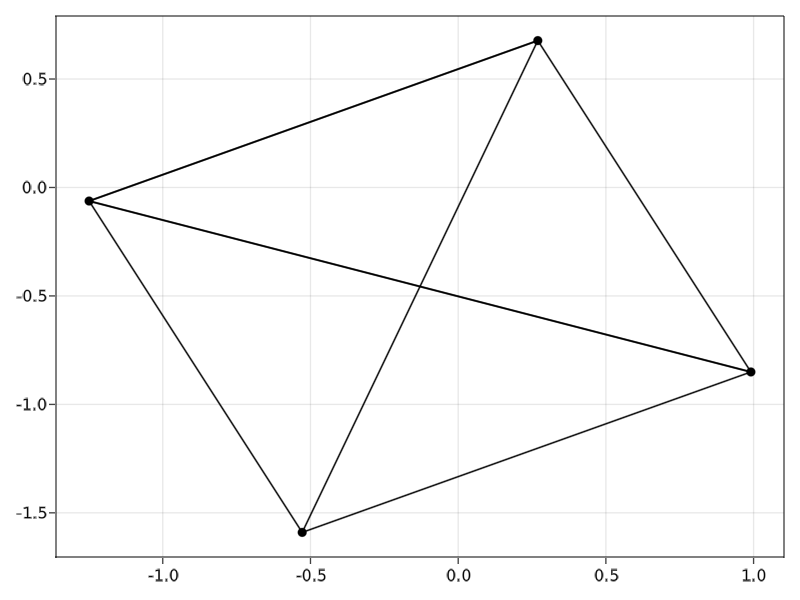

In [40]:
using GraphRecipes, Plots
using LightGraphs

n = 8
g = wheel_digraph(n)
edgelabel_dict = Dict()
edgelabel_mat = Array{String}(undef, n, n)
for i in 1:n
    for j in 1:n
        edgelabel_mat[i, j] = edgelabel_dict[(i, j)] = string("edge ", i, " to ", j)
    end
end
edgelabel_vec = edgelabel_mat[:]

graphplot(A, names=1:n, edgelabel=edgelabel_dict, curves=false, nodeshape=:rect)  # Or edgelabel=edgelabel_mat, or edgelabel=edgelabel_vec.


In [48]:
Pkg.add(url="git://github.com/afternone/GraphPlot.jl.git")

     Cloning git-repo `git://github.com/afternone/GraphPlot.jl.git`
    Updating git-repo `git://github.com/afternone/GraphPlot.jl.git`
   Resolving package versions...
   Installed Compose ─ v0.9.2
    Updating `~/.julia/environments/v1.6/Project.toml`
  [a2cc645c] + GraphPlot v0.5.0 `git://github.com/afternone/GraphPlot.jl.git#master`
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [a81c6b42] + Compose v0.9.2
  [a2cc645c] + GraphPlot v0.5.0 `git://github.com/afternone/GraphPlot.jl.git#master`
Precompiling project...
  ✓ AxisAlgorithms
  ✓ ChainRulesCore
  ✓ SimpleTraits
  ✓ DataStructures
  ✓ Latexify
  ✓ Static
  ✓ StackViews
  ✓ GeometryTypes
  ✓ PaddedViews
  ✓ Colors
  ✓ IJulia
  ✓ TimeZones
  ✓ MeshIO
  ✓ ShaderAbstractions
  ✓ SortingAlgorithms
  ✓ LogExpFunctions
  ✓ Interpolations
  ✓ QuadGK
  ✓ ArrayInterface
  ✓ MosaicViews
  ✓ Graphics
  ✓ Animations
  ✓ Graphs
  ✓ LightGraphs
  ✓ OpenEXR
  ✓ ColorBrewer
  ✓ ColorSchemes
  ✓ Intervals
  ✓ EllipsisNotation
  ✓ Sta

In [51]:
import Pkg; Pkg.add("Colors")
using Colors
using GraphPlot

   Resolving package versions...
    Updating `~/.julia/environments/v1.6/Project.toml`
  [5ae59095] + Colors v0.12.8
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
Precompiling project...
  ✓ SimpleTraits
  ✓ ChainRulesCore
  ✓ AxisAlgorithms
  ✓ DataStructures
  ✓ GeometryTypes
  ✓ Latexify
  ✓ StackViews
  ✓ Static
  ✓ PaddedViews
  ✓ Colors
  ✓ TimeZones
  ✓ IJulia
  ✓ MeshIO
  ✓ ShaderAbstractions
  ✓ SortingAlgorithms
  ✓ LogExpFunctions
  ✓ QuadGK
  ✓ ArrayInterface
  ✓ Interpolations
  ✓ MosaicViews
  ✓ Graphs
  ✓ LightGraphs
  ✓ Graphics
  ✓ Animations
  ✓ OpenEXR
  ✓ Intervals
  ✓ ColorBrewer
  ✓ ColorSchemes
  ✓ Compose
  ✓ EllipsisNotation
  ✓ StatsBase
  ✓ Cairo
  ✓ SimpleWeightedGraphs
  ✓ SpecialFunctions
  ✓ IntervalSets
  ✓ TiffImages
  ✓ GraphPlot
  ✓ Polynomials
  ✓ StatsFuns
  ✓ ColorVectorSpace
  ✓ PlotUtils
  ✓ RecipesPipeline
  ✓ FreeTypeAbstraction
  ✓ Distributions
  ✓ PlotThemes
  ✓ KernelDensity
  ✓ GraphRecipes
  ✓ MathTeXEngine
  ✓ ImageCore
  ✓

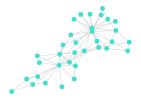

In [52]:
g = graphfamous("karate")
gplot(g)

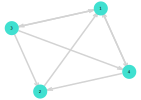

In [64]:
nodelabels = [x for x in 1:size(A)[1]]
gplot(A_graph, nodelabel=nodelabels)

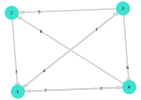

In [66]:
edgelabel = 1:Graphs.ne(A_graph)
gplot(A_graph, nodelabel=nodelabels, edgelabel=edgelabel)

In [98]:
A

4×4 Matrix{Float64}:
 0.0       0.0  1.0  0.5
 0.333333  0.0  0.0  0.0
 0.333333  0.5  0.0  0.5
 0.333333  0.5  0.0  0.0

In [106]:
A_graph = SimpleWeightedDiGraph(transpose(A))
A_adjacency = vec(A)
A_edges = zeros(Graphs.ne(A_graph))
i = 1
for x in 1:(size(A)[1]*size(A)[2])
    if A_adjacency[x] != 0
        A_edges[i] += A_adjacency[x]
        i += 1
    end
end
A_edges

8-element Vector{Float64}:
 0.3333333333333333
 0.3333333333333333
 0.3333333333333333
 0.5
 0.5
 1.0
 0.5
 0.5

In [107]:
A

4×4 Matrix{Float64}:
 0.0       0.0  1.0  0.5
 0.333333  0.0  0.0  0.0
 0.333333  0.5  0.0  0.5
 0.333333  0.5  0.0  0.0

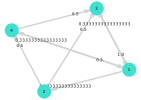

In [108]:
gplot(A_graph, nodelabel=nodelabels, edgelabel=A_edges)

In [423]:
function create_weighted_graph(A::Array{<:Real,2})
    A_graph = SimpleWeightedDiGraph(transpose(A))
    A_adjacency = vec(A)
    A_edges = zeros(Graphs.ne(A_graph))
    println(A_edges)
    i = 1
    for x in 1:(size(A)[1]*size(A)[2])
        if A_adjacency[x] != 0
            A_edges[i] += A_adjacency[x]
            i += 1
        end
    end
    A_edges = [round(x, digits = 3) for x in A_edges]
    println(A_edges)
    nodelabels = [x for x in 1:size(A)[1]]
    #gplot(A_graph, nodelabel=nodelabels, edgelabel=A_edges, linetype="curve", edgelabeldistx=0, edgelabeldisty=0)
    #gplot(A_graph, nodelabel=nodelabels, edgelabel=A_edges, edgelabeldistx=0, edgelabeldisty=0)
    layout=(args...)->spring_layout(args...; C=8)
    gplot(A_graph, nodelabel=nodelabels, edgelabel=A_edges, edgelabeldistx=0, edgelabeldisty=0, layout = layout)
end

create_weighted_graph (generic function with 1 method)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.06633135085840114, 0.8995202805475226, 0.9236549434126176, 0.3310507853024478, 0.7476056245220544, 0.6674598918700365, 0.22551368625980528, 0.3580224434525048, 0.49463413477000917, 0.24967697610157003, 0.3694070244434906, 0.9479400543945962, 0.08586927774220099, 0.4725178361333475, 0.3065266879269335, 0.8103892812698612, 0.6674598918700365, 0.6799434116751608, 0.3283290201617919, 0.969411144255004, 0.1098351832153992, 0.5134117871710897, 0.04405963932657575, 0.7

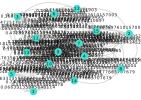

In [234]:
create_weighted_graph(A)

[0.0, 0.0]
[0.5, 1.0]


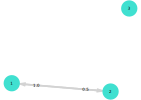

In [418]:
B = [
0   1 0;
0.5 0 0;
0   0 0
]
create_weighted_graph(B)

[0.0, 0.0]
[0.5, 1.0]


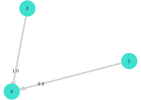

In [365]:
C = [
0   0 0;
0   0 0;
0.5 1 0
]
create_weighted_graph(C)

In [136]:
import Pkg; Pkg.add("StatsBase")
using Random
using StatsBase

   Resolving package versions...
    Updating `~/.julia/environments/v1.6/Project.toml`
  [2913bbd2] + StatsBase v0.33.13
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
Precompiling project...
  ✓ AxisAlgorithms
  ✓ ChainRulesCore
  ✓ SimpleTraits
  ✓ DataStructures
  ✓ Latexify
  ✓ StackViews
  ✓ Static
  ✓ PaddedViews
  ✓ GeometryTypes
  ✓ IJulia
  ✓ Colors
  ✓ TimeZones
  ✓ SortingAlgorithms
  ✓ ShaderAbstractions
  ✓ MeshIO
  ✓ LogExpFunctions
  ✓ QuadGK
  ✓ Interpolations
  ✓ ArrayInterface
  ✓ MosaicViews
  ✓ Graphics
  ✓ Animations
  ✓ Graphs
  ✓ LightGraphs
  ✓ OpenEXR
  ✓ ColorBrewer
  ✓ Intervals
  ✓ ColorSchemes
  ✓ EllipsisNotation
  ✓ StatsBase
  ✓ Cairo
  ✓ Compose
  ✓ SimpleWeightedGraphs
  ✓ IntervalSets
  ✓ SpecialFunctions
  ✓ Polynomials
  ✓ GraphPlot
  ✓ ColorVectorSpace
  ✓ StatsFuns
  ✓ TiffImages
  ✓ PlotUtils
  ✓ FreeTypeAbstraction
  ✓ RecipesPipeline
  ✓ Distributions
  ✓ PlotThemes
  ✓ GraphRecipes
  ✓ KernelDensity
  ✓ MathTeXEngine
  ✓ ImageCore

In [273]:
import Pkg; Pkg.add("Distributions")
using Distributions

   Resolving package versions...
    Updating `~/.julia/environments/v1.6/Project.toml`
  [31c24e10] + Distributions v0.25.34
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
Precompiling project...
  ✓ AxisAlgorithms
  ✓ ChainRulesCore
  ✓ SimpleTraits
  ✓ DataStructures
  ✓ Latexify
  ✓ StackViews
  ✓ Static
  ✓ PaddedViews
  ✓ GeometryTypes
  ✓ Colors
  ✓ IJulia
  ✓ TimeZones
  ✓ SortingAlgorithms
  ✓ ShaderAbstractions
  ✓ MeshIO
  ✓ LogExpFunctions
  ✓ QuadGK
  ✓ Interpolations
  ✓ MosaicViews
  ✓ ArrayInterface
  ✓ Graphics
  ✓ Animations
  ✓ Graphs
  ✓ LightGraphs
  ✓ OpenEXR
  ✓ ColorBrewer
  ✓ Intervals
  ✓ ColorSchemes
  ✓ EllipsisNotation
  ✓ StatsBase
  ✓ Cairo
  ✓ Compose
  ✓ SimpleWeightedGraphs
  ✓ IntervalSets
  ✓ SpecialFunctions
  ✓ Polynomials
  ✓ GraphPlot
  ✓ ColorVectorSpace
  ✓ StatsFuns
  ✓ TiffImages
  ✓ PlotUtils
  ✓ FreeTypeAbstraction
  ✓ RecipesPipeline
  ✓ Distributions
  ✓ PlotThemes
  ✓ GraphRecipes
  ✓ KernelDensity
  ✓ MathTeXEngine
  ✓ Image

In [292]:
function random_uniform_split(n::Int, x::Int=1)
    tot = 0
    ret = []
    for i in 2:n
        to_add = rand(Uniform(0, x))
        append!(ret, to_add)
        x -= to_add
        tot += to_add
    end
    append!(ret, (1-tot))
    # println(ret)
    # println(sum(ret))
    return ret
end

random_uniform_split(6)

6-element Vector{Any}:
 0.048674150675874106
 0.08230583427009373
 0.4272251928227575
 0.06371323689980608
 0.27191390551967626
 0.10616767981179231

In [488]:
function create_random_adjacency_matrix(replacement::Bool=true, self_edges::Bool=false, 
        random_weights::Bool=false, chaos_column_weight::Real=1., side=nothing)
    
    if isnothing(side)
        side = rand((3:6))
    end
    A = zeros(side, side)
    
    # Creating one "chaos column" to throw matrix out of wack
    chaos_col = rand((1:side))
    
    for j in 1:side
        # num_edges = rand((1:side))
        # weight = 1. / num_edges
        
        total_weight = 1.
        if ((chaos_column_weight != 1.) & (j == chaos_col))
             total_weight = chaos_column_weight
        end
        
        # Need a way to generate edges - with replacement for different weights, w/out for uniform
        if self_edges
            num_edges = rand((1:side))
            weight = total_weight / num_edges
            edges_to_add = sample(1:side, num_edges, replace = replacement)
        else
            num_edges = rand((2:side)) - 1
            weight = total_weight / num_edges
            edges_to_add = sample(filter!(x->x≠j,[x for x in 1:side]), num_edges, replace = replacement)
        end
        if random_weights
            k = 1
            random_weights_pool = sample(random_uniform_split(num_edges), num_edges, replace = replacement)
        end
        for i in edges_to_add
            if !random_weights
                A[i, j] += weight
            else
                if j != chaos_col
                    A[i, j] += random_weights_pool[k]
                    k += 1
                end
            end
        end
    end
    return A
end

D = create_random_adjacency_matrix(false, false, false)
#D = create_random_adjacency_matrix(false, false, false, 0)

5×5 Matrix{Float64}:
 0.0  0.333333  0.25  0.25  0.25
 1.0  0.0       0.25  0.25  0.25
 0.0  0.333333  0.0   0.25  0.25
 0.0  0.0       0.25  0.0   0.25
 0.0  0.333333  0.25  0.25  0.0

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.333, 0.333, 0.333, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
[0.0 0.3333333333333333 0.25 0.25 0.25; 1.0 0.0 0.25 0.25 0.25; 0.0 0.3333333333333333 0.0 0.25 0.25; 0.0 0.0 0.25 0.0 0.25; 0.0 0.3333333333333333 0.25 0.25 0.0]
[0.0 0.3333333333333333 0.25 0.25 0.25; 1.0 0.0 0.25 0.25 0.25; 0.0 0.3333333333333333 0.0 0.25 0.25; 0.0 0.0 0.25 0.0 0.25; 0.0 0.3333333333333333 0.25 0.25 0.0]
[0.2, 0.2, 0.2, 0.2, 0.2]
Largest eigenvalue (should be 1): 1.0
Page rank weight eigenvector: [0.22222222222222224, 0.3333333333333333, 0.17777777777777778, 0.08888888888888889, 0.17777777777777778]
Pages in order from most to least important: [2, 1, 3, 5, 4]
1: 0.222
2: 0.333
3: 0.178
4: 0.089
5: 0.178
[0.222, 0.333, 0.178, 0.089, 0.178]
Any["1: 0.222", "2: 0.333", "3: 0.178", "4: 0.089", "5: 0.178"]


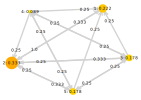

In [519]:
create_weighted_graph(D)

In [498]:
range(colorant"yellow", stop=colorant"red", length=100)

In [420]:
function create_segmented_adjacency_matrix(n::Int, chaos_weights::Array{<:Real,1}=[-1], replacement::Bool=true, self_edges::Bool=false, 
        random_weights::Bool=false)
    matrix_array = []
    matrix_size_array = []
    for m in 1:n
        segment_size = rand((2, 4))
        append!(matrix_size_array, segment_size)
    end
    
    # Building the big matrix
    full_size = sum(matrix_size_array)
    full_matrix = zeros(full_size, full_size)
    
    curr = 0
    for k in 1:n
        curr_size = matrix_size_array[k]
        if chaos_weights[1] != -1
            println("not nothing!")
            curr_weight = chaos_weights[k]
        else
            curr_weight = 1.
        end
        mat = create_random_adjacency_matrix(replacement, self_edges, random_weights, curr_weight, curr_size)
        for i in 1:curr_size
            for j in 1:curr_size
                full_matrix[curr+i, curr+j] = mat[i, j]
            end
        end
        curr += curr_size
    end
    
    return full_matrix
end

create_segmented_adjacency_matrix (generic function with 9 methods)

In [481]:
E = create_segmented_adjacency_matrix(3)
# E = create_segmented_adjacency_matrix(3, [1., 0, 1.])

8×8 Matrix{Float64}:
 0.0  1.0  0.0  0.0       0.0       0.0       0.0  0.0
 1.0  0.0  0.0  0.0       0.0       0.0       0.0  0.0
 0.0  0.0  0.0  0.666667  0.0       0.333333  0.0  0.0
 0.0  0.0  0.0  0.0       0.333333  0.333333  0.0  0.0
 0.0  0.0  1.0  0.333333  0.0       0.333333  0.0  0.0
 0.0  0.0  0.0  0.0       0.666667  0.0       0.0  0.0
 0.0  0.0  0.0  0.0       0.0       0.0       0.0  1.0
 0.0  0.0  0.0  0.0       0.0       0.0       1.0  0.0

In [517]:
function create_weighted_graph(A::Array{<:Real,2}, curve::Bool=false)
    A_graph = SimpleWeightedDiGraph(transpose(A))
    A_adjacency = vec(A)
    A_edges = zeros(Graphs.ne(A_graph))
    println(A_edges)
    i = 1
    for x in 1:(size(A)[1]*size(A)[2])
        if A_adjacency[x] != 0
            A_edges[i] += A_adjacency[x]
            i += 1
        end
    end
    A_edges = [round(x, digits = 3) for x in A_edges]
    println(A_edges)
    nodelabels = [x for x in 1:size(A)[1]]
    
    # Sizing and coloring by page rank
    ranking_output = page_rank(A)
    ranks = [round(x, digits = 3) for x in ranking_output[1]]
    
    color_range = range(colorant"yellow", stop=colorant"red", length=100)
    colors = [color_range[trunc(Int, x*99)+1] for x in ranking_output[1]]
    
    full_nodelabels = []
    for j in 1:size(A)[1]
        full_label = string(nodelabels[j], ": ", ranks[j])
        println(full_label)
        append!(full_nodelabels, " ")
        full_nodelabels[j] = full_label
    end
    
    println(ranks)
    println(full_nodelabels)
    
    #gplot(A_graph, nodelabel=nodelabels, edgelabel=A_edges, linetype="curve", edgelabeldistx=0, edgelabeldisty=0)
    #gplot(A_graph, nodelabel=nodelabels, edgelabel=A_edges, edgelabeldistx=0, edgelabeldisty=0)
    layout=(args...)->spring_layout(args...; C=12)
    if curve
        gplot(A_graph, nodelabel=full_nodelabels, edgelabel=A_edges, linetype="curve", 
            edgelabeldistx=0, edgelabeldisty=0, layout = layout, nodesize = ranks, nodefillc = colors)
    else
        gplot(A_graph, nodelabel=full_nodelabels, edgelabel=A_edges, edgelabeldistx=0, edgelabeldisty=0, 
            layout = layout, nodesize = ranks, nodefillc = colors)
    end
end

create_weighted_graph (generic function with 2 methods)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 0.667, 0.333, 0.333, 0.667, 0.333, 0.333, 0.333, 1.0, 1.0]
[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0; 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.6666666666666666 0.0 0.3333333333333333 0.0 0.0; 0.0 0.0 0.0 0.0 0.3333333333333333 0.3333333333333333 0.0 0.0; 0.0 0.0 1.0 0.3333333333333333 0.0 0.3333333333333333 0.0 0.0; 0.0 0.0 0.0 0.0 0.6666666666666666 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0; 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]
[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0; 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.6666666666666666 0.0 0.3333333333333333 0.0 0.0; 0.0 0.0 0.0 0.0 0.3333333333333333 0.3333333333333333 0.0 0.0; 0.0 0.0 1.0 0.3333333333333333 0.0 0.3333333333333333 0.0 0.0; 0.0 0.0 0.0 0.0 0.6666666666666666 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0; 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
Largest eigenvalue (should be 1): 1.0
Page rank weight eigenvector:

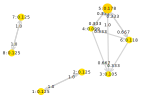

In [518]:
create_weighted_graph(E)

In [143]:
sample(1:3, 2)

2-element Vector{Int64}:
 3
 2

In [145]:
1:11

1:11

In [146]:
filter!(x->x≠10,[x for x in 1:11])

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 11

In [181]:
Pkg.add("Graphs")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
Precompiling project...
  ✓ AxisAlgorithms
  ✓ SimpleTraits
  ✓ ChainRulesCore
  ✓ DataStructures
  ✓ Latexify
  ✓ Static
  ✓ StackViews
  ✓ GeometryTypes
  ✓ PaddedViews
  ✓ Colors
  ✓ TimeZones
  ✓ IJulia
  ✓ SortingAlgorithms
  ✓ LogExpFunctions
  ✓ ShaderAbstractions
  ✓ MeshIO
  ✓ QuadGK
  ✓ Interpolations
  ✓ MosaicViews
  ✓ ArrayInterface
  ✓ Graphics
  ✓ Animations
  ✓ Graphs
  ✓ LightGraphs
  ✓ OpenEXR
  ✓ ColorBrewer
  ✓ Intervals
  ✓ ColorSchemes
  ✓ EllipsisNotation
  ✓ StatsBase
  ✓ Cairo
  ✓ Compose
  ✓ SimpleWeightedGraphs
  ✓ IntervalSets
  ✓ SpecialFunctions
  ✓ Polynomials
  ✓ GraphPlot
  ✓ ColorVectorSpace
  ✓ StatsFuns
  ✓ TiffImages
  ✓ PlotUtils
  ✓ FreeTypeAbstraction
  ✓ RecipesPipeline
  ✓ Distributions
  ✓ PlotThemes
  ✓ KernelDensity
  ✓ GraphRecipes
  ✓ MathTeXEngine
  ✓ ImageCore
  ✓ Netpbm
  ✓ PNGFiles
  ✓ Im